# Notebook to establish which Mtb area measurements are correct

Could be one of a series of possibilities: 
1. I selected max projection for one set of images and sum projection for another
2. I loaded one set of images using macrohet.tile and one set using Zarr
3. The way the intensity image is constructed for the localisation (shall I have 3 channels, quicker to have 1, what is that one channel that's being measured?)




In [69]:
import zarr
from macrohet import notify, dataio, tile
import os
import btrack
import glob
import pandas as pd
import seaborn as sns
import napari
import numpy as np
from macrohet import tools
from tqdm.auto import tqdm

### Firstly load PS0000 to see what is happening with that...

In [261]:
expt_ID = 'PS0000'
location = 'DATA' # 'NEMO' # 'SYNO'
base_dir = f'/mnt/{location}/macrohet_{location.lower()}/{expt_ID}/'
metadata_fn = os.path.join(base_dir, 'acquisition/Images/Index.idx.xml')
metadata = dataio.read_harmony_metadata(metadata_fn)  
metadata_fn = glob.glob(os.path.join(base_dir, 'acquisition/Assaylayout/*.xml'))[0]
assay_layout = dataio.read_harmony_metadata(metadata_fn, assay_layout=True,)

Reading metadata XML file...


0it [00:00, ?it/s]

Extracting metadata complete!
Reading metadata XML file...
Extracting metadata complete!


In [277]:
acq_ID = row, column = (3, 5) 

### Load objects, segmentation and tracks to see what's going on

In [278]:
with btrack.io.HDF5FileHandler(os.path.join(base_dir, f'labels/macrohet_seg_model/{row, column}.h5'), 
                                           'r', 
                                           obj_type='obj_type_1'
                                           ) as reader:
   
    segmentation = reader.segmentation
    objects = reader.objects
    tracks = reader.tracks

[INFO][2024/02/15 01:55:52 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(3, 5).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(3, 5).h5...
[INFO][2024/02/15 01:56:02 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 01:56:02 pm] Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
[INFO][2024/02/15 01:56:02 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 01:56:02 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 01:56:02 pm] Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
[INFO][2024/02/15 01:56:03 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_mode

In [22]:
track = [t for t in tracks if t.ID == 1][0]
track.properties['mean_intensity']

array([[2220.02539062,  473.16897583,  167.32542419],
       [2549.69238281,  498.70181274,  202.66197205],
       [2653.45874023,  502.46835327,  210.38287354],
       [2736.91162109,  501.90518188,  212.07096863],
       [2490.94726562,  502.56442261,  204.56584167],
       [2874.94213867,  491.78152466,  194.77839661],
       [3846.3269043 ,  620.78747559,  374.18365479],
       [3843.484375  ,  589.83666992,  316.76126099],
       [3873.73706055,  599.49688721,  326.61529541],
       [          nan,           nan,           nan],
       [3224.58666992,  575.63549805,  312.10107422],
       [2647.68676758,  508.27984619,  214.22186279],
       [2830.63769531,  528.24023438,  239.4868927 ],
       [2050.76147461,  476.90484619,  170.54632568],
       [2425.42529297,  501.46609497,  203.90190125],
       [2238.22875977,  491.09738159,  188.59886169],
       [2371.50292969,  531.08093262,  241.79483032],
       [2402.54199219,  511.90707397,  213.61198425],
       [2430.87451172,  533.

## There isn't a measure of the thresholded _area_ in the raw tracks, but it does exist in the sc_df

In [279]:
# df = pd.read_pickle('/mnt/DATA/macrohet_data/PS0000/results/preliminary_sc_measures/sc_dfs/(3, 5)_<70_sc_df_GT_dev.pkl')
df = pd.read_pickle('/mnt/DATA/macrohet_data/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area_false_outliers_removed.pkl')

In [280]:
sc_df = df[df['Unique ID'] == '1.3.5']

In [281]:
sc_df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15"
0,0,46.797680,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,...,0.000000,0.000000,292.26361,473.168976,167.325424,True,True,True,NaN,6.314185
1,1,48.719647,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,...,1.921968,4.106972,292.26361,498.701813,202.661972,True,True,True,NaN,6.314185
2,2,52.206007,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,...,3.486360,7.155963,292.26361,502.468353,210.382874,True,True,True,NaN,6.314185
3,3,50.552221,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,...,-1.653786,-3.167808,292.26361,501.905182,212.070969,True,True,True,NaN,6.314185
4,4,54.463202,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,...,3.910981,7.736516,292.26361,502.564423,204.565842,True,True,True,NaN,6.314185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,70,176.239972,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25142.0,...,7.397341,4.381205,292.26361,1060.786987,850.660828,True,True,True,3.410375,6.314185
69,71,163.747182,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25147.0,...,-12.492790,-7.088511,292.26361,1014.572998,803.551819,True,True,True,2.115654,6.314185
70,72,160.417261,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,24532.0,...,-3.329921,-2.033574,292.26361,1024.834229,811.440186,True,True,True,2.146942,6.314185
71,73,172.552476,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,24277.0,...,12.135215,7.564781,292.26361,1105.395996,912.100281,True,True,True,3.075148,6.314185


/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

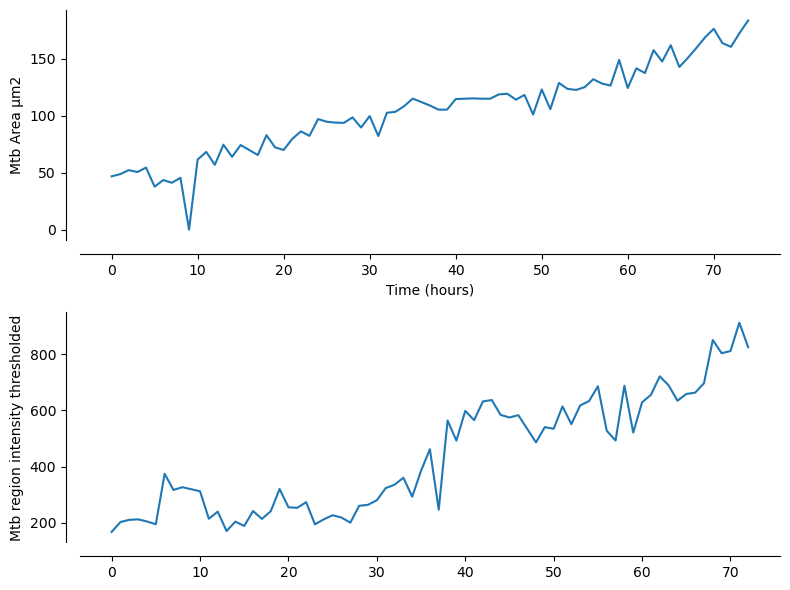

In [42]:
# Figure and Subplot Setup
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # Create two subplots

# --- Plot 1 ---
sns.lineplot(data=sc_df, x='Time (hours)', y='Mtb Area µm2', ax=ax1)
sns.despine(offset=10, ax=ax1)  # Apply despine to the top plot

# --- Plot 2 --- 
sns.lineplot(x=range(len(track.properties['mean_intensity'])),
             y=track.properties['mean_intensity'][:, 2], ax=ax2)
sns.despine(offset=10, ax=ax2)  # Apply despine to the bottom plot
ax2.set_ylabel('Mtb region intensity thresholded')

# Overall adjustments
fig.tight_layout()  # Adjust spacing between subplots
plt.show()

## This shows that Mtb area is the better choice, but is the area measurement correct? 

In [346]:
image_dir = os.path.join(base_dir, 'acquisition/Images')
images = tile.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             # subset_field_IDs=['16', '17',  '20', '21'], 
                             # n_tile_rows = 2, n_tile_cols = 2,
                             set_plane='max_proj',
                             set_channel=2,
                             set_time = 0,
#                             input_transforms = [input_transforms]
                            ).compute().compute()
# images = images[:,:,0,...]
images[:,0,...]

In [350]:
viewer.add_image(images[:,0,...])

<Image layer 'Image' at 0x7f3612b952e0>

In [348]:
base_dir

'/mnt/DATA/macrohet_data/PS0000/'

In [309]:
images = images[0]

In [310]:
rfp_t0 = images[1,...]

In [311]:
gfp_t0 = images[0,...]

In [312]:
row, column

(3, 5)

In [313]:
viewer = napari.Viewer(title = 'PS0000, 3,5, checking int area values')

viewer.add_image(rfp_t0)
viewer.add_labels(segmentation[0])

<Labels layer 'Labels' at 0x7f361e37a970>

In [314]:
viewer.add_image(gfp_t0)

<Image layer 'gfp_t0' at 0x7f36194c1550>

In [62]:
viewer.add_points([int(876*5.04), int(519*5.04)], size = 100)

<Points layer 'Points [1]' at 0x7f358dd655b0>

### Manually checking Mtb area

In [64]:
segment_ID = 423
mask = segmentation[0] == 423
masked_rfp = mask * rfp_t0

In [65]:
viewer.add_image(masked_rfp)

<Image layer 'masked_rfp' at 0x7f3772a0c8e0>

##### The next step is threshold above 480 then count the area of the binary expression

In [66]:
masked_threshold_rfp = masked_rfp >= 480

In [67]:
viewer.add_image(masked_threshold_rfp)

<Image layer 'masked_threshold_rfp' at 0x7f3772eba970>

In [70]:
np.sum(masked_threshold_rfp)

2094

##### Then multiply that number of pixels by the area scaling factor

In [73]:
metadata['ImageResolutionX'].iloc[0]

'1.4949402023919043E-07'

In [80]:
image_resolution = 1.4949402023919043E-07 #= float(metadata['ImageResolutionX'].iloc[0])
resolution_micrometers_per_pixel = image_resolution * 1_000_000
print(f'The area of the Mtb is {np.sum(masked_threshold_rfp) * (resolution_micrometers_per_pixel ** 2)} µm2')

The area of the Mtb is 46.79767961075484 µm2


# Double checking all PS0000 area measurements

In [238]:
df.keys()

Index(['Time (hours)', 'Strain', 'Compound', 'Concentration', 'Unique ID',
       'Acquisition ID', 'Cell ID', 'Mphi Area', 'Mphi GFP', 'x', 'y',
       'Eccentricity', 'MSD', 'Technical Replicate', 'Strain/Compound',
       'Mtb Area µm2', 'Mtb RFP', 'Mtb RFP thresholded'],
      dtype='object')

In [239]:
df['Mphi Area µm2'] = df['Mphi Area'] * (resolution_micrometers_per_pixel ** 2)

In [241]:
df['Mtb to Mphi area µm2 ratio'] = df['Mtb Area µm2']/df['Mphi Area µm2'] 

In [247]:
df['Acquisition ID'].unique()

array([(3, 5)], dtype=object)

# Checking other positions

In [248]:
df = pd.read_pickle('/mnt/DATA/macrohet_data/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area_false_outliers_removed.pkl')

In [252]:
df.keys()

Index(['Time (hours)', 'Mtb Area', 'dMtb', 'Strain', 'Compound',
       'Concentration', 'Unique ID', 'Acquisition ID', 'Cell ID', 'Mphi Area',
       'Mphi GFP', 'x', 'y', 'Eccentricity', 'MSD', 'Technical Replicate',
       'Strain/Compound', 'dMtb/dt', '%dMtb/dt', '%dMtb', 'Mean Mtb Intensity',
       'Thresholded Mean Mtb Intensity', 'Infection Status',
       'Initial Infection Status', 'Final Infection Status', 'dMtb/dt,T=15',
       'Max. dMtb/dt,T=15'],
      dtype='object')

/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time (hours)', ylabel='Mtb Area'>

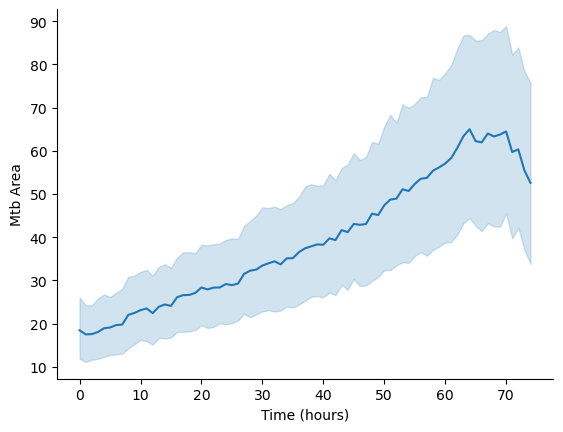

In [253]:
sns.lineplot(data = df, x = 'Time (hours)', y = 'Mtb Area')

In [257]:
df['Concentration'].unique()

array(['EC0', 'EC50', 'EC99'], dtype=object)

/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time (hours)', ylabel='Mtb Area'>

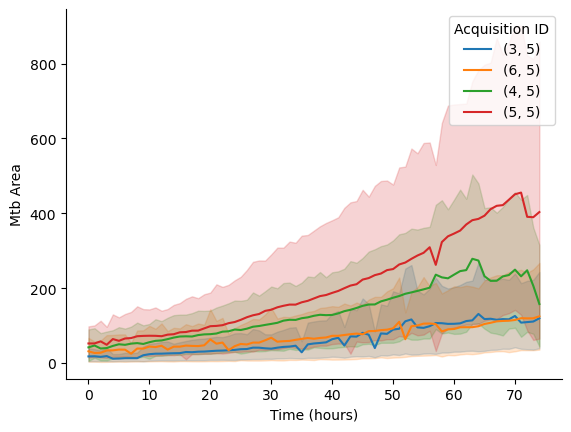

In [259]:
sns.lineplot(data = df[(df['Strain']=='WT')&(df['Concentration']=='EC0')], x = 'Time (hours)', y = 'Mtb Area', hue = 'Acquisition ID')

In [262]:
assay_layout

Strain Compound Concentration ConcentrationEC
Row Column                                              
3   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      INH          0.04            EC50
    9          WT      BDQ          0.02            EC50
4   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      INH          0.04            EC50
    9          WT      BDQ          0.02            EC50
5   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      INH             2            EC99
    9          WT      BDQ           2.5            EC99
6   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      INH             2            EC99
    9          WT      BDQ           2.5            EC99

In [282]:
for acq_ID, info in assay_layout.iterrows():
    subset_df = df[df['Acquisition ID'] == acq_ID]
    average_mtb_area = np.mean(subset_df['Mtb Area'])
    range = np.max(subset_df['Mtb Area']) - np.min(subset_df['Mtb Area'])
    # print(acq_ID, average_mtb_area, range)
    print(acq_ID, subset_df['Mtb Area'].max())

(3, 4) 147.23166823097083
(3, 5) 9653.0
(3, 6) 137.64417799552965
(3, 7) 143.67826275909403
(3, 8) 6476.0
(3, 9) 180.6202705893604
(4, 4) 66.44197778546999
(4, 5) 13317.0
(4, 6) 13492.0
(4, 7) 254.66206500000007
(4, 8) 165.44566483210033
(4, 9) 10004.0
(5, 4) 299.0685600000001
(5, 5) 23191.0
(5, 6) 9345.0
(5, 7) 6063.0
(5, 8) 148.5278790320328
(5, 9) 270.41639125603325
(6, 4) 155.0089330373427
(6, 5) 8314.0
(6, 6) 189.8948823555797
(6, 7) 90.77945299851298
(6, 8) 140.43773575643908
(6, 9) 200.04108414320277


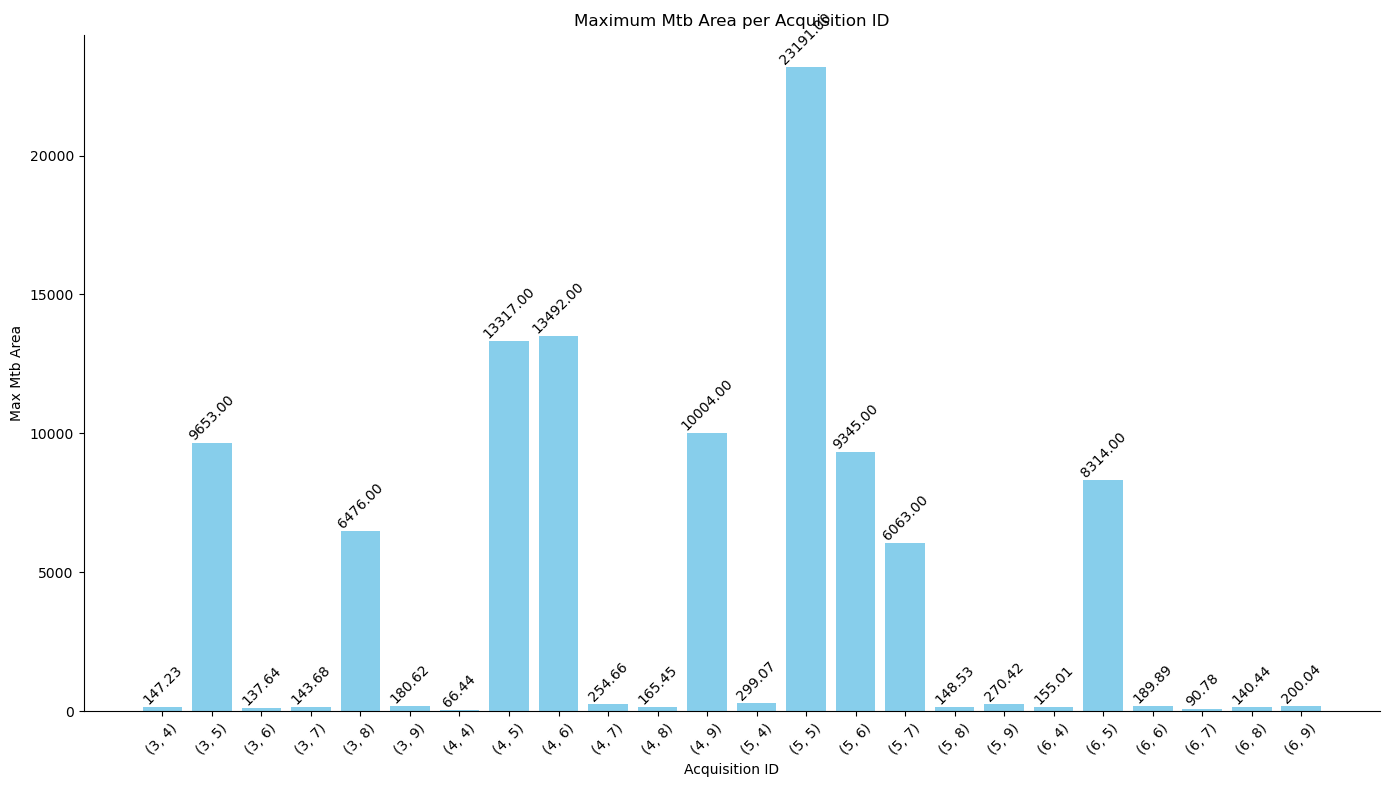

In [289]:
# Initialize a dictionary to store the maximum Mtb Area for each Acquisition ID
max_mtb_areas = {}

# Loop through assay_layout to calculate the maximum Mtb Area for each Acquisition ID
for acq_ID, info in assay_layout.iterrows():
    subset_df = df[df['Acquisition ID'] == acq_ID]
    max_mtb_area = subset_df['Mtb Area'].max()
    max_mtb_areas[acq_ID] = max_mtb_area

# Convert the dictionary to a DataFrame for plotting
max_areas_df = pd.DataFrame(list(max_mtb_areas.items()), columns=['Acquisition ID', 'Max Mtb Area'])

# Convert 'Acquisition ID' tuples to string representation for plotting
max_areas_df['Acquisition ID'] = max_areas_df['Acquisition ID'].astype(str)

# Plotting with corrected 'Acquisition ID' as string
plt.figure(figsize=(14, 8))
bars = plt.bar(max_areas_df['Acquisition ID'], max_areas_df['Max Mtb Area'], color='skyblue')
plt.xlabel('Acquisition ID')
plt.ylabel('Max Mtb Area')
plt.title('Maximum Mtb Area per Acquisition ID')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Overlay the value of max area on the plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', rotation=45)

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [296]:
subset_df = df[df['Acquisition ID'] == (3,5)]

In [297]:
subset_df['Mtb Area']

0         46.797680
1         48.719647
2         52.206007
3         50.552221
4         54.463202
            ...    
296255     0.000000
296256     8.872339
296257     0.000000
296258     0.000000
296259     0.000000
Name: Mtb Area, Length: 12688, dtype: float64

In [298]:
# Count the number of integer values in the 'Mtb Area' series
number_of_integers = subset_df['Mtb Area'].astype(int).eq(subset_df['Mtb Area']).sum()

# Print the result
print(f"Number of integer values in 'Mtb Area': {number_of_integers} out of a total of {len(df)}")


Number of integer values in 'Mtb Area': 5565 out of a total of 291526


In [299]:
subset_df['Acquisition ID'].unique()

array([(3, 5)], dtype=object)

In [300]:
subset_df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15"
0,0,46.797680,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,...,0.000000,0.000000,292.26361,473.168976,167.325424,True,True,True,NaN,6.314185
1,1,48.719647,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,...,1.921968,4.106972,292.26361,498.701813,202.661972,True,True,True,NaN,6.314185
2,2,52.206007,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,...,3.486360,7.155963,292.26361,502.468353,210.382874,True,True,True,NaN,6.314185
3,3,50.552221,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,...,-1.653786,-3.167808,292.26361,501.905182,212.070969,True,True,True,NaN,6.314185
4,4,54.463202,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,...,3.910981,7.736516,292.26361,502.564423,204.565842,True,True,True,NaN,6.314185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296255,70,0.000000,0.000000,WT,CTRL,EC0,99.3.5,"(3, 5)",99,47470.0,...,0.000000,0.000000,0.00000,388.573425,0.000000,True,True,True,0.000000,0.591489
296256,71,8.872339,0.000000,WT,CTRL,EC0,99.3.5,"(3, 5)",99,41936.0,...,8.872339,inf,0.00000,409.822296,21.552986,True,True,True,0.591489,0.591489
296257,72,0.000000,0.000000,WT,CTRL,EC0,99.3.5,"(3, 5)",99,53247.0,...,-8.872339,-100.000000,0.00000,387.400879,0.000000,True,True,True,0.000000,0.591489
296258,73,0.000000,0.000000,WT,CTRL,EC0,99.3.5,"(3, 5)",99,43669.0,...,0.000000,0.000000,0.00000,393.975342,0.000000,True,True,True,0.000000,0.591489


/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time (hours)', ylabel='Mtb Area'>

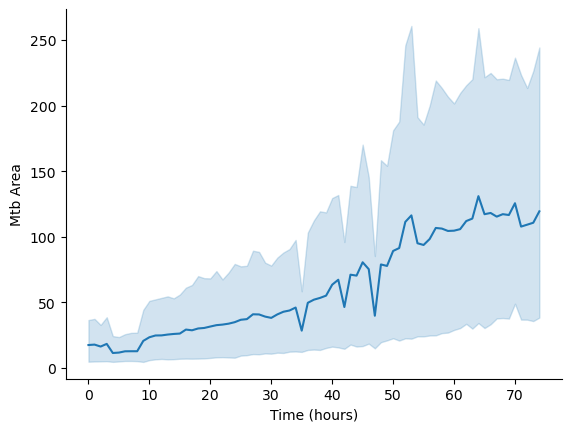

In [301]:
### this is just 3,5 df so looks like it matches the range
sns.lineplot(data = subset_df, x = 'Time (hours)', y = 'Mtb Area')

### isolating the outliers from this time series and checking the area measurements

In [307]:
subset_df[(subset_df['Mtb Area'].astype(int).eq(subset_df['Mtb Area']))&(subset_df['Mtb Area']!=0.0)]

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15"
80070,0,1160.0,5768.0,WT,CTRL,EC0,289.3.5,"(3, 5)",289,39609.0,...,0.0,0.000000,497.241379,441.045410,79.187531,True,True,True,NaN,439.0
80071,1,1202.0,5768.0,WT,CTRL,EC0,289.3.5,"(3, 5)",289,29292.0,...,42.0,3.620690,497.241379,468.448669,112.375259,True,True,True,NaN,439.0
80072,2,936.0,5768.0,WT,CTRL,EC0,289.3.5,"(3, 5)",289,18588.0,...,-266.0,-22.129784,497.241379,486.792999,138.834946,True,True,True,NaN,439.0
80073,3,1178.0,5768.0,WT,CTRL,EC0,289.3.5,"(3, 5)",289,32784.0,...,242.0,25.854701,497.241379,451.972839,89.517052,True,True,True,NaN,439.0
80074,5,26.0,5768.0,WT,CTRL,EC0,289.3.5,"(3, 5)",289,10108.0,...,-1152.0,-97.792869,497.241379,395.243774,7.391670,True,True,True,NaN,439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173209,66,3775.0,2550.0,WT,CTRL,EC0,486.3.5,"(3, 5)",486,12097.0,...,-263.0,-6.513125,4636.363636,1118.471680,909.679199,True,True,True,119.666667,296.0
173210,67,3030.0,2550.0,WT,CTRL,EC0,486.3.5,"(3, 5)",486,10057.0,...,-745.0,-19.735099,4636.363636,1114.267578,905.143311,True,True,True,64.733333,296.0
173211,68,2901.0,2550.0,WT,CTRL,EC0,486.3.5,"(3, 5)",486,9328.0,...,-129.0,-4.257426,4636.363636,1077.675781,875.497192,True,True,True,28.200000,296.0
173212,69,2724.0,2550.0,WT,CTRL,EC0,486.3.5,"(3, 5)",486,8462.0,...,-177.0,-6.101344,4636.363636,1077.960327,881.356201,True,True,True,21.733333,296.0


In [317]:
subset_df[subset_df['Unique ID'] == '289.3.5']['y']

80070    1056.830688
80071    1060.568604
80072    1056.297119
80073    1057.954346
80074    1067.251099
            ...     
80139    1037.674805
80140    1035.251953
80141    1036.097168
80142    1036.338013
80143    1036.958740
Name: y, Length: 74, dtype: float64

In [318]:
viewer.add_points([int(1056*5.04), int(203*5.04)], size = 100)

<Points layer 'Points' at 0x7f3618f68cd0>

### Manually checking Mtb area

In [319]:
segment_ID = 543
mask = segmentation[0] == segment_ID
masked_rfp = mask * rfp_t0

In [320]:
viewer.add_image(masked_rfp)

<Image layer 'masked_rfp' at 0x7f3617fb0b20>

##### The next step is threshold above 480 then count the area of the binary expression

In [321]:
masked_threshold_rfp = masked_rfp >= 480

In [322]:
viewer.add_image(masked_threshold_rfp)

<Image layer 'masked_threshold_rfp' at 0x7f36153c3700>

In [323]:
np.sum(masked_threshold_rfp)

1160

##### Then multiply that number of pixels by the area scaling factor

In [73]:
metadata['ImageResolutionX'].iloc[0]

'1.4949402023919043E-07'

In [328]:
resolution_micrometers_per_pixel

0.14949402023919042

In [324]:
image_resolution = 1.4949402023919043E-07 #= float(metadata['ImageResolutionX'].iloc[0])
resolution_micrometers_per_pixel = image_resolution * 1_000_000
print(f'The area of the Mtb is {np.sum(masked_threshold_rfp) * (resolution_micrometers_per_pixel ** 2)} µm2')

The area of the Mtb is 25.924216021239552 µm2


In [335]:
prob_ids = []
for acq_ID, info in assay_layout.iterrows():
    subset_df = df[df['Acquisition ID'] == acq_ID]
    for unique_ID in subset_df[(subset_df['Mtb Area'].astype(int).eq(subset_df['Mtb Area']))&(subset_df['Mtb Area']!=0.0)]['Unique ID'].unique():
        sc_df = df[df['Unique ID']==unique_ID]
        prob_ids.append(unique_ID)
        print(unique_ID, len(sc_df[(sc_df['Mtb Area'].astype(int).eq(sc_df['Mtb Area']))]))#&(sc_df['Mtb Area']!=0.0)]))

289.3.5 74
352.3.5 75
486.3.5 71
671.3.8 74
985.3.8 71
11.4.5 71
118.4.5 75
254.4.5 73
301.4.5 74
327.4.5 74
795.4.5 73
85.4.5 75
264.4.6 71
131.4.9 75
377.4.9 73
304.5.5 73
376.5.5 75
506.5.5 75
624.5.5 75
161.5.6 75
375.5.6 75
587.5.7 75
130.6.5 75
169.6.5 75
625.6.5 75


##### So these are the cells taht are problematic... 

In [355]:
[track_ID for track_ID in prob_ids if track_ID[-3:] == f'{row}.{column}'] 

['289.3.5', '352.3.5', '486.3.5']

# Fixing these...

In [359]:
acq_IDs = [#(3, 5),
           (3, 8), (4, 5), (4, 6), (4, 9), (5, 5), (5, 6), (5, 7), (6, 5)]

In [360]:
# area_dict = {}
for acq_ID in tqdm(acq_IDs, desc = 'Iterating over positions'):
    row, column = acq_ID
    ### load tracks
    ### load masks
    with btrack.io.HDF5FileHandler(os.path.join(base_dir, f'labels/macrohet_seg_model/{row, column}.h5'), 
                                           'r', 
                                           obj_type='obj_type_1'
                                           ) as reader:
        segmentation = reader.segmentation
        tracks = reader.tracks
    ### load rfp images
    images = tile.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             set_plane='max_proj',
                             set_channel=2,
                            ).compute().compute()
    rfp_images = images[:,0,...]
    ### find tracks in this acq_ID
    unique_IDs = [track_ID for track_ID in prob_ids if track_ID[-3:] == f'{row}.{column}'] 
    ### iterate over tracks
    for unique_ID in tqdm(unique_IDs, desc = 'Iterating over tracks', leave = False):
        ### get track ID
        track_ID = int(unique_ID.split('.')[0])
        ### get track 
        track = [t for t in tracks if t.ID == track_ID][0]
        ### calculate mtb area
        mtb_areas = tools.measure_mtb_area(track, segmentation, rfp_images)
        ### check if len(mtb_areas) matches that of df im trying to integrate into 
        area_dict[unique_ID] = mtb_areas

Iterating over positions:   0%|          | 0/8 [00:00<?, ?it/s]

[INFO][2024/02/15 03:26:05 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(3, 8).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(3, 8).h5...
[INFO][2024/02/15 03:26:14 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 03:26:14 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 03:26:14 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 03:26:14 pm] Loading objects/obj_type_1 (47396, 5) (47396 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (47396, 5) (47396 filtered: None)
[INFO][2024/02/15 03:26:15 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(3, 8).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(3, 8).h5


Iterating over tracks:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 671:   0%|          | 0/74 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 985:   0%|          | 0/71 [00:00<?, ?it/s]

[INFO][2024/02/15 03:30:50 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 5).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 5).h5...
[INFO][2024/02/15 03:30:58 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 03:30:58 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 03:30:58 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 03:30:58 pm] Loading objects/obj_type_1 (47242, 5) (47242 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (47242, 5) (47242 filtered: None)
[INFO][2024/02/15 03:30:59 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 5).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 5).h5


Iterating over tracks:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 11:   0%|          | 0/71 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 118:   0%|          | 0/75 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 254:   0%|          | 0/73 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 301:   0%|          | 0/74 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 327:   0%|          | 0/74 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 795:   0%|          | 0/73 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 85:   0%|          | 0/75 [00:00<?, ?it/s]

[INFO][2024/02/15 03:35:50 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 6).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 6).h5...
[INFO][2024/02/15 03:35:59 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 03:35:59 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 03:35:59 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 03:35:59 pm] Loading objects/obj_type_1 (43883, 5) (43883 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (43883, 5) (43883 filtered: None)
[INFO][2024/02/15 03:35:59 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 6).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 6).h5


Iterating over tracks:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 264:   0%|          | 0/71 [00:00<?, ?it/s]

[INFO][2024/02/15 03:40:22 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 9).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 9).h5...
[INFO][2024/02/15 03:40:30 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 03:40:30 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 03:40:30 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 03:40:31 pm] Loading objects/obj_type_1 (44643, 5) (44643 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (44643, 5) (44643 filtered: None)
[INFO][2024/02/15 03:40:31 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 9).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(4, 9).h5


Iterating over tracks:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 131:   0%|          | 0/75 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 377:   0%|          | 0/73 [00:00<?, ?it/s]

[INFO][2024/02/15 03:45:49 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 5).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 5).h5...
[INFO][2024/02/15 03:46:14 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 03:46:14 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 03:46:14 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 03:46:14 pm] Loading objects/obj_type_1 (42973, 5) (42973 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (42973, 5) (42973 filtered: None)
[INFO][2024/02/15 03:46:15 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 5).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 5).h5


Iterating over tracks:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 304:   0%|          | 0/73 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 376:   0%|          | 0/75 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 506:   0%|          | 0/75 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 624:   0%|          | 0/75 [00:00<?, ?it/s]

[INFO][2024/02/15 03:54:15 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 6).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 6).h5...
[INFO][2024/02/15 03:54:48 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 03:54:48 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 03:54:48 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 03:54:49 pm] Loading objects/obj_type_1 (45678, 5) (45678 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (45678, 5) (45678 filtered: None)
[INFO][2024/02/15 03:54:50 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 6).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 6).h5


Iterating over tracks:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 161:   0%|          | 0/75 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 375:   0%|          | 0/75 [00:00<?, ?it/s]

[INFO][2024/02/15 04:00:14 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 7).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 7).h5...
[INFO][2024/02/15 04:00:25 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 04:00:26 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 04:00:26 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 04:00:26 pm] Loading objects/obj_type_1 (47880, 5) (47880 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (47880, 5) (47880 filtered: None)
[INFO][2024/02/15 04:00:30 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 7).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(5, 7).h5


Iterating over tracks:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 587:   0%|          | 0/75 [00:00<?, ?it/s]

[INFO][2024/02/15 04:08:59 pm] Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(6, 5).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(6, 5).h5...
[INFO][2024/02/15 04:09:33 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/02/15 04:09:33 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/02/15 04:09:33 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/02/15 04:09:33 pm] Loading objects/obj_type_1 (46808, 5) (46808 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (46808, 5) (46808 filtered: None)
[INFO][2024/02/15 04:09:34 pm] Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(6, 5).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet_data/PS0000/labels/macrohet_seg_model/(6, 5).h5


Iterating over tracks:   0%|          | 0/3 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 130:   0%|          | 0/75 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 169:   0%|          | 0/75 [00:00<?, ?it/s]

Calculating mtb area for every frame in track: 625:   0%|          | 0/75 [00:00<?, ?it/s]

In [361]:
len(prob_ids)

25

In [362]:
len(area_dict)

25

In [365]:
for unique_ID in area_dict.keys():
    df.loc[df['Unique ID'] == unique_ID, 'Mtb Area'] = area_dict[unique_ID]

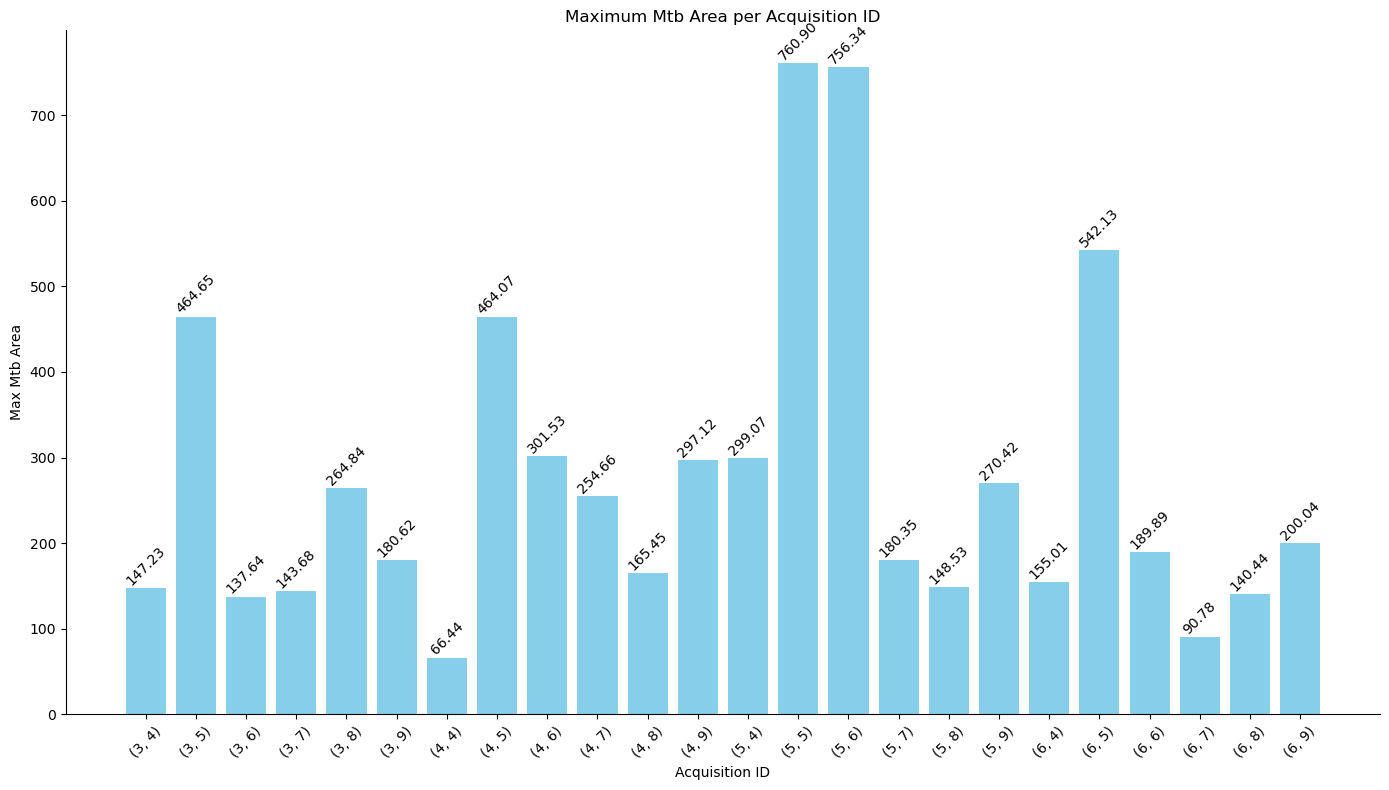

In [366]:
# Initialize a dictionary to store the maximum Mtb Area for each Acquisition ID
max_mtb_areas = {}

# Loop through assay_layout to calculate the maximum Mtb Area for each Acquisition ID
for acq_ID, info in assay_layout.iterrows():
    subset_df = df[df['Acquisition ID'] == acq_ID]
    max_mtb_area = subset_df['Mtb Area'].max()
    max_mtb_areas[acq_ID] = max_mtb_area

# Convert the dictionary to a DataFrame for plotting
max_areas_df = pd.DataFrame(list(max_mtb_areas.items()), columns=['Acquisition ID', 'Max Mtb Area'])

# Convert 'Acquisition ID' tuples to string representation for plotting
max_areas_df['Acquisition ID'] = max_areas_df['Acquisition ID'].astype(str)

# Plotting with corrected 'Acquisition ID' as string
plt.figure(figsize=(14, 8))
bars = plt.bar(max_areas_df['Acquisition ID'], max_areas_df['Max Mtb Area'], color='skyblue')
plt.xlabel('Acquisition ID')
plt.ylabel('Max Mtb Area')
plt.title('Maximum Mtb Area per Acquisition ID')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Overlay the value of max area on the plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', rotation=45)

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


# Looks like i fixed the probelm, save out and double check

In [367]:
df.to_pickle('/mnt/DATA/macrohet_data/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area_false_outliers_removed_correct.pkl')

In [368]:
df.to_pickle('/mnt/SYNO/macrohet_syno/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area_false_outliers_removed_correct.pkl')

# The tools.measure_mtb_area() function works as expected

### Now load ND0002 to see what is happening with that...

In [81]:
expt_ID = 'ND0002'
location =  'SYNO' #'DATA' # 'NEMO' #
base_dir = f'/mnt/{location}/macrohet_{location.lower()}/{expt_ID}/'
metadata_fn = os.path.join(base_dir, 'acquisition/Images/Index.idx.xml')
metadata = dataio.read_harmony_metadata(metadata_fn)  
metadata_fn = glob.glob(os.path.join(base_dir, 'acquisition/Assaylayout/*.xml'))[0]
assay_layout = dataio.read_harmony_metadata(metadata_fn, assay_layout=True,)

Reading metadata XML file...


0it [00:00, ?it/s]

Extracting metadata complete!
Reading metadata XML file...
Extracting metadata complete!


In [83]:
assay_layout

Strain Compound Concentration ConcentrationEC
Row Column                                              
3   1         UNI     CTRL             0             EC0
    2         UNI     CTRL             0             EC0
    3          WT     CTRL             0             EC0
    4          WT     CTRL             0             EC0
    5          WT      PZA            60            EC50
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      RIF           0.1            EC50
    9          WT      INH          0.04            EC50
    10         WT      INH          0.04            EC50
    11         WT      BDQ          0.02            EC50
    12         WT      BDQ          0.02            EC50
4   3          WT     CTRL             0             EC0
    4          WT     CTRL             0             EC0
    5          WT      PZA           400            EC99
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      RIF             2            EC99
    9          WT      INH             2            EC99
    10         WT      INH             2            EC99
    11         WT      BDQ           2.5            EC99
    12         WT      BDQ           2.5            EC99
5   3         RD1     CTRL             0             EC0
    4         RD1     CTRL             0             EC0
    5         RD1      PZA            60            EC50
    6         RD1      PZA            60            EC50
    7         RD1      RIF           0.1            EC50
    8         RD1      RIF           0.1            EC50
    9         RD1      INH          0.04            EC50
    10        RD1      INH          0.04            EC50
    11        RD1      BDQ          0.02            EC50
    12        RD1      BDQ          0.02            EC50
6   3         RD1     CTRL             0             EC0
    4         RD1     CTRL             0             EC0
    5         RD1      PZA           400            EC99
    6         RD1      PZA           400            EC99
    7         RD1      RIF             2            EC99
    8         RD1      RIF             2            EC99
    9         RD1      INH             2            EC99
    10        RD1      INH             2            EC99
    11        RD1      BDQ           2.5            EC99
    12        RD1      BDQ           2.5            EC99

In [84]:
acq_ID = row, column = (3, 4) 

### Load objects, segmentation and tracks to see what's going on

In [85]:
'/mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/'

'/mnt/SYNO/macrohet_syno/ND0002/'

In [88]:
with btrack.io.HDF5FileHandler(os.path.join(base_dir, f'labels/macrohet_seg_model/{row, column}_first_pass_warea.h5'), 
                                           'r', 
                                           obj_type='obj_type_1'
                                           ) as reader:
   
    segmentation = reader.segmentation
    objects = reader.objects
    # tracks = reader.tracks

[INFO][2024/02/14 02:24:16 pm] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass_warea.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass_warea.h5...
[INFO][2024/02/14 02:24:35 pm] Loading segmentation (150, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (150, 6048, 6048)
[INFO][2024/02/14 02:24:36 pm] Loading objects/obj_type_1 (50109, 5) (50109 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (50109, 5) (50109 filtered: None)
[INFO][2024/02/14 02:24:37 pm] Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass_warea.h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass_warea.h5


## There isn't a measure of the thresholded _area_ in the raw tracks, but it does exist in the sc_df

In [95]:
df = pd.read_pickle('/mnt/SYNO/macrohet_syno/ND0002/results/unchecked_74_corrected_area_df.pkl')

In [99]:
finding_example_df = df.drop_duplicates(subset='Unique ID', keep = 'first')

In [106]:
finding_example_df[ (finding_example_df['Mtb Area'] > 40) & (finding_example_df['Mtb Area'] < 46) ]


,index,Time (hours),x,y,x scaled,y scaled,Infection status,Initial infection status,Final infection status,Area,Mtb Area,Eccentricity,MSD,Strain,Compound,Concentration,Technical replicate,Cell ID,Acquisition ID,Unique ID
14963,14963,26.0,328.865489,441.229243,1657.482066,2223.795385,1.0,1.0,1.0,42685.0,43.311320,0.717623,0.0,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
15663,15663,30.0,1126.028513,132.066935,5675.183706,665.617353,1.0,1.0,1.0,17196.0,40.137838,0.867961,0.0,WT,CTRL,EC0,2.0,3494,"(3, 4)",3494.3.4
20330,20330,0.0,820.921305,799.525282,4137.443377,4029.607423,1.0,1.0,1.0,205710.0,40.227232,0.776407,0.0,WT,CTRL,EC0,3.0,82,"(4, 3)",82.4.3
23846,23846,2.0,854.887918,584.158974,4308.635106,2944.161228,1.0,1.0,0.0,47411.0,42.573820,0.808762,0.0,WT,CTRL,EC0,3.0,738,"(4, 3)",738.4.3
40541,40541,0.5,1032.857515,658.755484,5205.601877,3320.127638,1.0,1.0,1.0,240893.0,44.741621,0.959281,0.0,WT,CTRL,EC0,4.0,481,"(4, 4)",481.4.4
41421,41421,1.5,635.002407,130.621954,3200.412131,658.334648,1.0,1.0,1.0,21811.0,45.322681,0.577085,0.0,WT,CTRL,EC0,4.0,662,"(4, 4)",662.4.4
46124,46124,22.0,923.441636,925.285781,4654.145847,4663.440335,1.0,1.0,1.0,64033.0,42.819653,0.864995,0.0,WT,CTRL,EC0,4.0,2841,"(4, 4)",2841.4.4
46520,46520,24.0,786.505255,1161.891014,3963.986487,5855.930709,1.0,1.0,1.0,56761.0,44.004122,0.959561,0.0,WT,CTRL,EC0,4.0,3057,"(4, 4)",3057.4.4
49434,49434,37.0,197.994990,657.142713,997.894751,3311.999272,1.0,1.0,1.0,417554.0,43.288971,0.906127,0.0,WT,CTRL,EC0,4.0,4342,"(4, 4)",4342.4.4
82227,82227,33.5,1088.034501,459.220877,5483.693884,2314.473218,1.0,1.0,1.0,84553.0,42.551472,0.885875,0.0,WT,PZA,EC50,2.0,3125,"(3, 6)",3125.3.6


In [139]:
sc_df = df[df['Unique ID'] == '82.4.3'] # doesnt really look like a track
sc_df = df[df['Unique ID'] == '3168.3.4']

In [140]:
sc_df

,index,Time (hours),x,y,x scaled,y scaled,Infection status,Initial infection status,Final infection status,Area,Mtb Area,Eccentricity,MSD,Strain,Compound,Concentration,Technical replicate,Cell ID,Acquisition ID,Unique ID
14963,14963,26.0,328.865489,441.229243,1657.482066,2223.795385,1.0,1.0,1.0,42685.0,43.311320,0.717623,0.000000,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
14964,14964,26.5,320.590183,424.196437,1615.774524,2137.950042,1.0,1.0,1.0,14272.0,26.661715,0.771135,18.936662,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
14965,14965,27.0,328.092522,444.224794,1653.586313,2238.892964,1.0,1.0,1.0,41500.0,23.823461,0.710033,21.387384,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
14966,14966,27.5,331.781157,450.879288,1672.177033,2272.431610,1.0,1.0,1.0,28023.0,8.917036,0.705864,7.608437,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
14967,14967,28.0,321.872104,450.555522,1622.235405,2270.799829,1.0,1.0,1.0,53699.0,36.450342,0.498342,9.914341,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15049,15049,69.5,334.283129,400.222108,1684.786969,2017.119423,1.0,1.0,1.0,24250.0,19.621950,0.800760,1.049883,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
15050,15050,70.0,335.425920,400.578271,1690.546637,2018.914487,1.0,1.0,1.0,22289.0,11.196580,0.823945,1.197006,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
15051,15051,70.5,334.516655,399.612296,1685.963940,2014.045972,1.0,1.0,1.0,25929.0,6.458706,0.879888,1.326602,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4
15052,15052,71.0,335.177300,402.490632,1689.293594,2028.552786,1.0,1.0,1.0,24476.0,16.895437,0.860394,2.953180,WT,CTRL,EC0,2.0,3168,"(3, 4)",3168.3.4


/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


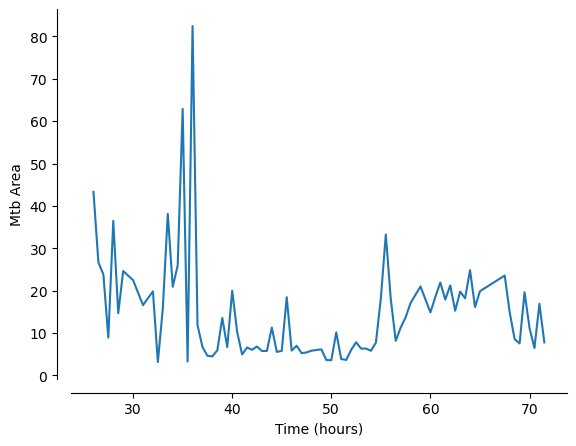

In [141]:
sns.lineplot(data=sc_df, x='Time (hours)', y='Mtb Area',)# ax=ax1)
sns.despine(offset=10, ) #ax=ax1)  # Apply despine to the top plot

/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


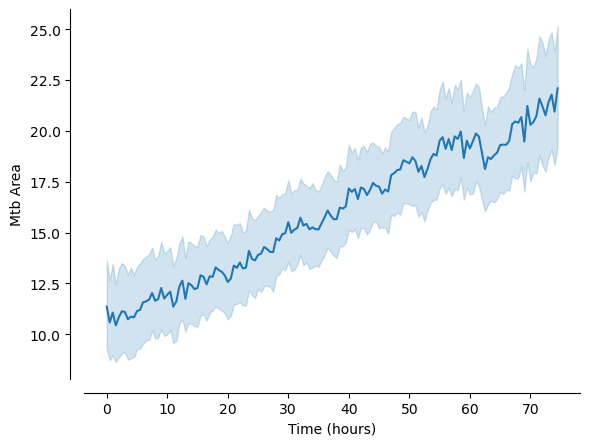

In [127]:
sns.lineplot(data=df, x='Time (hours)', y='Mtb Area',)# ax=ax1)
sns.despine(offset=10, )

In [233]:
viewer.add_points([13, 2223, 1657], size = 50)

<Points layer 'Points [7]' at 0x7f35ea70c370>

## Why Area so fluctuating?

In [112]:
image_dir = os.path.join(base_dir, 'acquisition/Images')
images = tile.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             # subset_field_IDs=['16', '17',  '20', '21'], 
                             # n_tile_rows = 2, n_tile_cols = 2,
                             set_plane='max_proj',
                             # set_channel=1,
                             # set_time = 0,
#                             input_transforms = [input_transforms]
                            ).compute().compute()
# images = images[:,:,0,...]

In [113]:
images = images[0]

In [119]:
rfp_t0 = images[0,...]

In [120]:
gfp_t0 = images[1,...]

In [121]:
viewer = napari.Viewer(title = 'ND2, 3,4')

viewer.add_image(rfp_t0)
viewer.add_labels(segmentation[0])

<Labels layer 'Labels' at 0x7f376a7055e0>

In [122]:
viewer.add_image(gfp_t0)

<Image layer 'gfp_t0' at 0x7f376a4eea60>

In [123]:
print()

In [142]:
coords = [(y*5.04, x*5.04) for y, x in zip(sc_df['y'].values.astype(int), sc_df['x'].values.astype(int))]

In [143]:
viewer.add_points(coords)

<Points layer 'Points [5]' at 0x7f33397e3a00>

In [144]:
viewer.add_points(coords[0])

<Points layer 'Points [6]' at 0x7f3339751160>

### Tracks don't seem to align to segments - do the objects?

In [150]:
coords = [(int(o.y*5.04), int(o.x*5.04)) for o in objects if o.t == 0]

In [151]:
viewer.add_points(coords, size = 50)

<Points layer 'Points [8]' at 0x7f3540619820>

### yes they do, try tracking again

In [153]:
scale_factor = 5.04

In [162]:
max([o.x for o in objects])

1196.084716796875

In [157]:
segmentation.shape[-2]*scale_factor

30481.920000000002

In [159]:
# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:
    # configure the tracker using a config file
    tracker.configure('/home/dayn/analysis/models/btrack/particle_config_pnassign.json')
    # set max search radius
    tracker.max_search_radius = 20
    # define tracking method
    tracker.tracking_updates = ["MOTION", "VISUAL"]
    # redefine features so that both channels are included in track measurements
    tracker.features = list(objects[0].properties.keys())
    # append the objects to be tracked
    tracker.append(objects)
    # set the tracking volume
    tracker.volume=((0, segmentation.shape[-2]/5.04), (0, segmentation.shape[-1]/5.04))
    # track them (in interactive mode)
    tracker.track(step_size=25)
    # generate hypotheses and run the global optimizer
    tracker.optimize()
    # store the tracks
    tracks = tracker.tracks

[INFO][2024/02/14 03:21:16 pm] Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
INFO:btrack.libwrapper:Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
[INFO][2024/02/14 03:21:16 pm] Starting BayesianTracker session
INFO:btrack.core:Starting BayesianTracker session
[INFO][2024/02/14 03:21:16 pm] Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
INFO:btrack.config:Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
[INFO][2024/02/14 03:21:16 pm] Objects are of type: <class 'list'>
INFO:btrack.io.utils:Objects are of type: <class 'list'>
[INFO][2024/02/14 03:21:17 pm] Starting tracking... 
INFO:btrack.core:Starting tracking... 
[INFO][2024/02/14 03:21:17 pm] Update using: ['VISUAL', 'MOTION']
INFO:btrack.core:Update using: ['VISUAL', 'MOTION']
[INFO][2024/02/14 03:21:17 pm] Tracking objects in frames 0 to 24 (of 150)...
INFO:btrack.core:Tracking objects in frames 0 to 2

GLPK Integer Optimizer 5.0
28360 rows, 24284 columns, 34388 non-zeros
24284 integer variables, all of which are binary
Preprocessing...
14180 rows, 24284 columns, 34388 non-zeros
24284 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 14180
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
14180 rows, 24284 columns, 34388 non-zeros
*     0: obj =   8.323166831e+04 inf =   0.000e+00 (6970)
Perturbing LP to avoid stalling [2555]...
Removing LP perturbation [7056]...
*  7056: obj =   4.086291182e+04 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+  7056: mip =     not found yet >=              -inf        (1; 0)
+  7056: >>>>>   4.086291182e+04 >=   4.086291182e+04   0.0% (1; 0)
+  7056: mip =   4.086291182e+04 >=     tree is empty   0.0% (0; 1)
INTEGER O

[INFO][2024/02/14 03:21:41 pm] Ending BayesianTracker session
INFO:btrack.core:Ending BayesianTracker session


In [175]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari(tracks, ndim=2)

In [176]:
viewer.add_tracks(napari_tracks, scale = (scale_factor, scale_factor))

<Tracks layer 'napari_tracks' at 0x7f34cc2e7250>

### Load all images 

In [177]:
base_dir

'/mnt/SYNO/macrohet_syno/ND0002/'

In [180]:
zarr_images = zarr.open(f'/mnt/{location}/macrohet_{location.lower()}/{expt_ID}/acquisition/zarr/{acq_ID}.zarr')

In [182]:
%%time
images_full_stack = zarr_images.images[:]

CPU times: user 44.7 s, sys: 1min, total: 1min 45s
Wall time: 5min 31s


In [185]:
images_full_stack.shape

(150, 2, 3, 6048, 6048)

In [186]:
%%time
images_full_stack_max_proj = np.max(images_full_stack, axis = 2)

CPU times: user 12.5 s, sys: 2.33 s, total: 14.9 s
Wall time: 14.9 s


In [188]:
images_full_stack_max_proj

(150, 2, 6048, 6048)

In [189]:
viewer.add_image(images_full_stack_max_proj, channel_axis=1,)

[<Image layer 'Image' at 0x7f333ac03c40>,
 <Image layer 'Image [1]' at 0x7f333a7b1850>]

In [190]:
viewer.add_labels(segmentation)

<Labels layer 'segmentation' at 0x7f3772b54b50>

In [ ]:
viewer.add

### Can't find same cell as in tracks but will work with this one

In [193]:
track = [t for t in tracks if t.ID == 68][0]

In [198]:
len(track)

10

In [220]:
track.properties['mean_intensity'][:,0]

array([262.38956, 291.4889 , 303.71353, 265.57138, 296.68488, 155.9773 ,
       163.48   , 152.00943, 167.80421, 130.8847 ], dtype=float32)

### Manually checking Mtb area

In [201]:
segment_ID = 177
mask = segmentation[0] == segment_ID
masked_rfp = mask * rfp_t0

In [202]:
viewer.add_image(masked_rfp)

<Image layer 'masked_rfp' at 0x7f35b39e3c10>

##### The next step is threshold above 480 then count the area of the binary expression

In [203]:
masked_threshold_rfp = masked_rfp >= 480

In [204]:
viewer.add_image(masked_threshold_rfp)

<Image layer 'masked_threshold_rfp' at 0x7f35b3e22340>

In [205]:
np.sum(masked_threshold_rfp)

1573

##### Then multiply that number of pixels by the area scaling factor

In [207]:
image_resolution = 1.4949402023919043E-07 #= float(metadata['ImageResolutionX'].iloc[0])
resolution_micrometers_per_pixel = image_resolution * 1_000_000
print(f'The area of the Mtb is {np.sum(masked_threshold_rfp) * (resolution_micrometers_per_pixel ** 2)} µm2')

The area of the Mtb is 35.15413086328432 µm2


In [209]:
6/resolution_micrometers_per_pixel

40.135384615384616

In [212]:
viewer.layers['Shapes'].data

[array([[   0.        , 2568.44249156, 3401.37303943],
        [   0.        , 2568.44249156, 3437.32742164],
        [   0.        , 2603.43809025, 3437.32742164],
        [   0.        , 2603.43809025, 3401.37303943]])]

In [215]:
2603 - 2568.44249156

34.55750844000022

In [216]:
3437-3401

36

# The area measurement above seems correct, so is the issue with the tracking step?

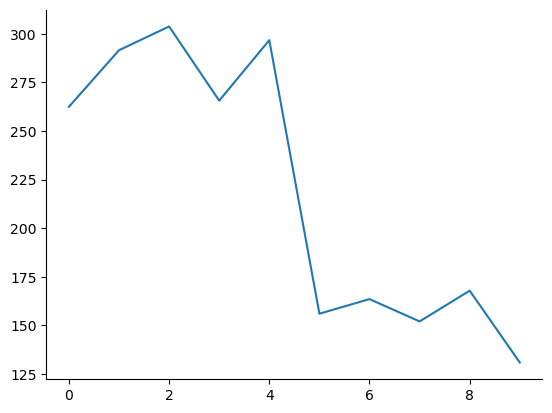

In [221]:
plt.plot(track.properties['mean_intensity'][:,0])

In [224]:
images_full_stack_max_proj.shape

(150, 2, 6048, 6048)

In [231]:
areas = []
segment_IDs = [177, 166, 190, 184, 187, 174, 179, 182, 191, 173]
for i, segment_ID in enumerate(segment_IDs):
    # segment_ID = 177
    mask = segmentation[i] == segment_ID
    masked_rfp = mask * images_full_stack_max_proj[i,0,...]
    masked_threshold_rfp = masked_rfp >= 480
    areas.append(np.sum(masked_threshold_rfp) * (resolution_micrometers_per_pixel ** 2))
    # if i == 3:
    #     break

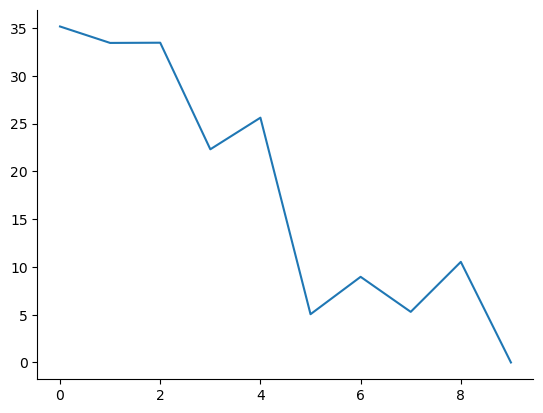

In [232]:
plt.plot(areas)

In [230]:
viewer.add_image(masked_threshold_rfp)

<Image layer 'masked_threshold_rfp [2]' at 0x7f35407e9b50>

##### Then multiply that number of pixels by the area scaling factor

In [207]:
image_resolution = 1.4949402023919043E-07 #= float(metadata['ImageResolutionX'].iloc[0])
resolution_micrometers_per_pixel = image_resolution * 1_000_000
print(f'The area of the Mtb is {np.sum(masked_threshold_rfp) * (resolution_micrometers_per_pixel ** 2)} µm2')

The area of the Mtb is 35.15413086328432 µm2


### Manually checking Mtb area

In [64]:
segment_ID = 423
mask = segmentation[0] == 423
masked_rfp = mask * rfp_t0

In [65]:
viewer.add_image(masked_rfp)

<Image layer 'masked_rfp' at 0x7f3772a0c8e0>

##### The next step is threshold above 480 then count the area of the binary expression

In [66]:
masked_threshold_rfp = masked_rfp >= 480

In [67]:
viewer.add_image(masked_threshold_rfp)

<Image layer 'masked_threshold_rfp' at 0x7f3772eba970>

In [70]:
np.sum(masked_threshold_rfp)

2094

##### Then multiply that number of pixels by the area scaling factor

In [73]:
metadata['ImageResolutionX'].iloc[0]

'1.4949402023919043E-07'

In [80]:
image_resolution = 1.4949402023919043E-07 #= float(metadata['ImageResolutionX'].iloc[0])
resolution_micrometers_per_pixel = image_resolution * 1_000_000
print(f'The area of the Mtb is {np.sum(masked_threshold_rfp) * (resolution_micrometers_per_pixel ** 2)} µm2')

The area of the Mtb is 46.79767961075484 µm2
